In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import folium
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [3]:
warnings.filterwarnings("ignore")

path = "C:/Users/ashkl/Documents/Loyola/data visualization/Takoma_Park_Crash_Incidents_Data.csv"
df = pd.read_csv(path, usecols= ['Crash Date/Time', 'Hit/Run', 'Surface Condition', 'First Harmful Event', 'Latitude', 'Longitude'])

In [4]:
df.shape

(989, 6)

In [5]:
df.columns

Index(['Crash Date/Time', 'Hit/Run', 'Surface Condition',
       'First Harmful Event', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
df.isna().sum()

Crash Date/Time         0
Hit/Run                 0
Surface Condition      34
First Harmful Event    36
Latitude                0
Longitude               0
dtype: int64

In [7]:
df = df[df['Surface Condition'].notna() & df['First Harmful Event'].notna()]
df.isna().sum()
df.shape

(920, 6)

In [8]:
df.head()

,Crash Date/Time,Hit/Run,Surface Condition,First Harmful Event,Latitude,Longitude
0,5/23/2023 19:22,Yes,DRY,OTHER VEHICLE,38.977617,-76.991754
1,6/22/2023 18:00,No,WET,OTHER VEHICLE,38.992535,-76.991553
2,3/5/2023 21:45,No,DRY,PARKED VEHICLE,38.983611,-77.020167
3,12/10/2023 14:46,No,WET,OTHER VEHICLE,38.986680,-77.021505
4,6/26/2023 22:20,No,DRY,FIXED OBJECT,38.984796,-77.003101


In [9]:
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'], format = '%m/%d/%Y %H:%M') 
df.replace(('Yes', 'No'), (1, 0), inplace=True)
df.dtypes


Crash Date/Time        datetime64[ns]
Hit/Run                         int64
Surface Condition              object
First Harmful Event            object
Latitude                      float64
Longitude                     float64
dtype: object

In [10]:
df['Year'] = df['Crash Date/Time'].dt.year

In [11]:
surface_condition_by_year = df.groupby(['Year', 'Surface Condition'])['Year'].count().reset_index(name = 'count')
surface_condition_by_year = pd.DataFrame(surface_condition_by_year) #just in case it's not a dataframe

In [12]:
surface_condition_by_year.Year.value_counts()

Year
2015    6
2016    5
2017    5
2018    5
2019    4
2020    3
2022    3
2021    2
2023    2
Name: count, dtype: int64

''

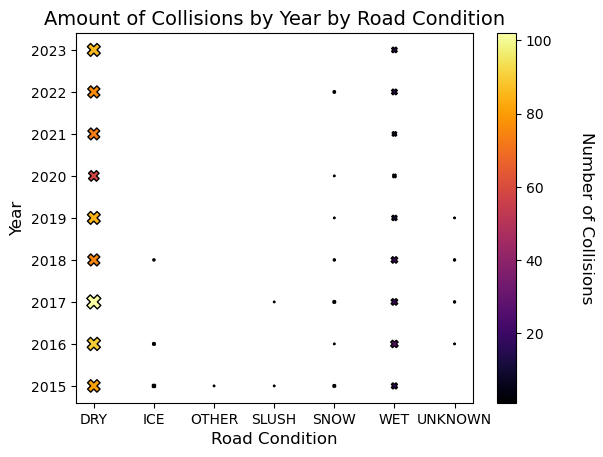

In [13]:

plt.scatter(surface_condition_by_year['Surface Condition'], surface_condition_by_year['Year'], marker = 'X', cmap = 'inferno', 
            c = surface_condition_by_year['count'], s = surface_condition_by_year['count'], edgecolors= 'black')
plt.title("Amount of Collisions by Year by Road Condition", fontsize = 14)
plt.xlabel("Road Condition", fontsize = 12)
plt.ylabel("Year", fontsize = 12)
cbar = plt.colorbar()
cbar.set_label("Number of Collisions", rotation = 270, fontsize = 12, 
               color = 'black', labelpad = 30)
plt.savefig('ScatterPlot.png', dpi=300)
;

# Bar plot of Collision count by year

In [14]:
crash_by_year = df.groupby(['Year', 'First Harmful Event'])['Year'].count().reset_index(name = 'count')
crash_by_year = pd.DataFrame(crash_by_year) 

In [15]:
crash_year_count = df.groupby(['Year'])['Year'].count().reset_index(name = 'count')
crash_year_count = pd.DataFrame(crash_year_count)
crash_year_count

,Year,count
0,2015,112
1,2016,124
2,2017,131
3,2018,103
4,2019,102
5,2020,66
6,2021,84
7,2022,96
8,2023,102


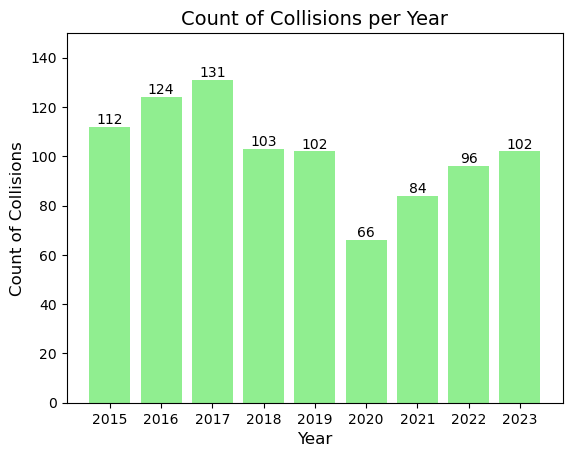

In [16]:
x_axis = crash_year_count['Year']
y_axis = crash_year_count['count']

fig, ax = plt.subplots()
bar_container = ax.bar(x_axis, y_axis, color ='lightgreen')

labels = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'] 

plt.xticks(x_axis, labels) 
plt.title("Count of Collisions per Year", fontsize = 14)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Count of Collisions", fontsize = 12)
plt.ylim(0,150)

ax.bar_label(bar_container, fmt='{:,.0f}');

# Map of Collisions 

In [18]:
df['First Harmful Event'].unique()   
df = pd.DataFrame(df)
# df.loc[ 'Light']

In [19]:
keep = ['OTHER VEHICLE', 'PARKED VEHICLE', 'FIXED OBJECT', 'PEDESTRIAN', 'BICYCLE']
map_df = df[df['First Harmful Event'].isin(keep)] 
crash_map_df = map_df.groupby(['First Harmful Event']).size().reset_index(name = 'Count')
crash_map_df

,First Harmful Event,Count
0,BICYCLE,7
1,FIXED OBJECT,113
2,OTHER VEHICLE,616
3,PARKED VEHICLE,103
4,PEDESTRIAN,40


In [20]:
center_of_map = [38.98164529888358, -77.01052686517662] 
my_map = folium.Map(location = center_of_map,
                   zoom_start = 13,
                   width = '90%',
                   height = '100%',
                   left = '5%',
                   right = '5%',
                   top = '0%') 
tiles = ['CartoDB Positron', 'openstreetmap']
for tile in tiles:
    folium.TileLayer(tile).add_to(my_map)
folium.LayerControl().add_to(my_map)

for index, row in map_df.iterrows():
    if row['First Harmful Event'] == 'BICYCLE':
        color = 'green'
    elif row['First Harmful Event'] == 'FIXED OBJECT':
        color = 'blue'  
    elif row['First Harmful Event'] == 'OTHER VEHICLE':
        color = 'orange' 
    elif row['First Harmful Event'] == 'PARKED VEHICLE':
        color = 'yellow' 
    else:
        color = 'red' 
    folium.Circle(location=[row['Latitude'], row['Longitude']],
                  radius=50,
                  color=color,
                  fill=True,
                  fill_color=color,
                  fill_opacity=0.5).add_to(my_map)
my_map


# heat map of crashes by year and month

In [21]:
df['Month'] = df['Crash Date/Time'].dt.month
df['Hour'] = df['Crash Date/Time'].dt.hour
df['Weekday'] = df['Crash Date/Time'].dt.strftime('%a')
crash_by_month_by_year = df.groupby(['Year', 'Month'])['Year'].count().reset_index(name = 'count')
crash_by_month_by_year = pd.DataFrame(crash_by_month_by_year)
crash_by_month_by_year


,Year,Month,count
0,2015,1,10
1,2015,2,16
2,2015,3,11
3,2015,4,8
4,2015,5,8
...,...,...,...
103,2023,8,6
104,2023,9,10
105,2023,10,10
106,2023,11,13


In [22]:
heatmap_df = pd.pivot_table(crash_by_month_by_year, index = 'Year', 
                            columns= 'Month', values = 'count')
heatmap_df

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,10,16,11,8,8,10,8,4,15,9,6,7
2016,9,9,9,13,12,9,7,9,9,12,15,11
2017,10,5,9,8,12,7,12,14,17,12,10,15
2018,12,6,8,11,8,6,6,7,7,16,8,8
2019,9,8,6,8,6,10,10,9,9,11,11,5
2020,6,5,7,1,4,3,3,5,5,9,10,8
2021,8,5,10,4,7,3,6,6,5,10,10,10
2022,13,7,2,9,11,8,8,7,5,8,7,11
2023,7,10,4,7,7,12,11,6,10,10,13,5


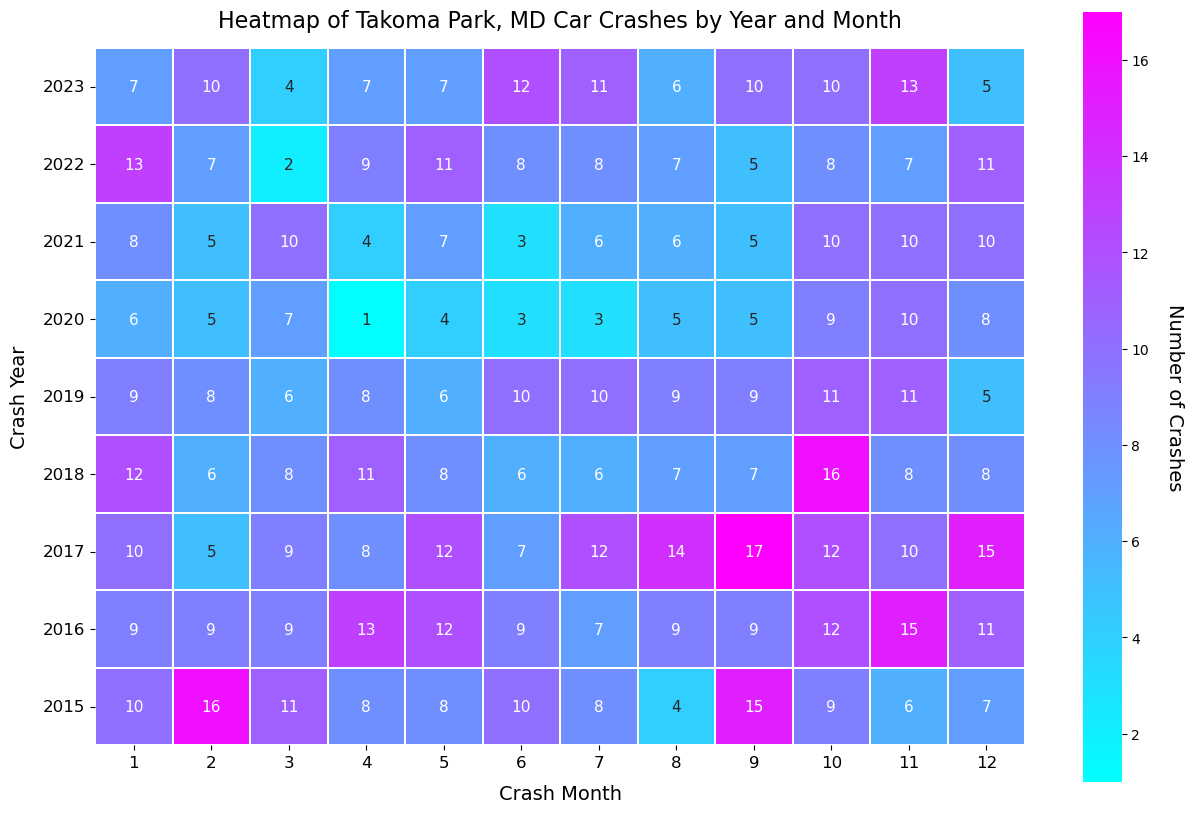

In [23]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)


ax = sns.heatmap(heatmap_df, linewidth = 0.2, annot=True, cmap = 'cool', 
                square=True, annot_kws={'size': 11})
ax.invert_yaxis()

plt.title('Heatmap of Takoma Park, MD Car Crashes by Year and Month', fontsize=16, pad=15)
plt.xlabel('Crash Month', fontsize=14, labelpad=10)
plt.ylabel('Crash Year', fontsize=14, labelpad=10)
plt.yticks(rotation = 0, size=12)
plt.xticks(size=12)

cbar = ax.collections[0].colorbar
cbar.set_label('Number of Crashes', rotation=270, fontsize=14, color='black',
              labelpad=25)

plt.show(ax)

In [24]:
crash_by_day = df.groupby(['Hour', 'Weekday'])['Weekday'].count().reset_index(name = 'count')
crash_by_day

,Hour,Weekday,count
0,0,Fri,3
1,0,Mon,4
2,0,Sat,4
3,0,Sun,6
4,0,Thu,2
...,...,...,...
154,23,Sat,4
155,23,Sun,3
156,23,Thu,1
157,23,Tue,1


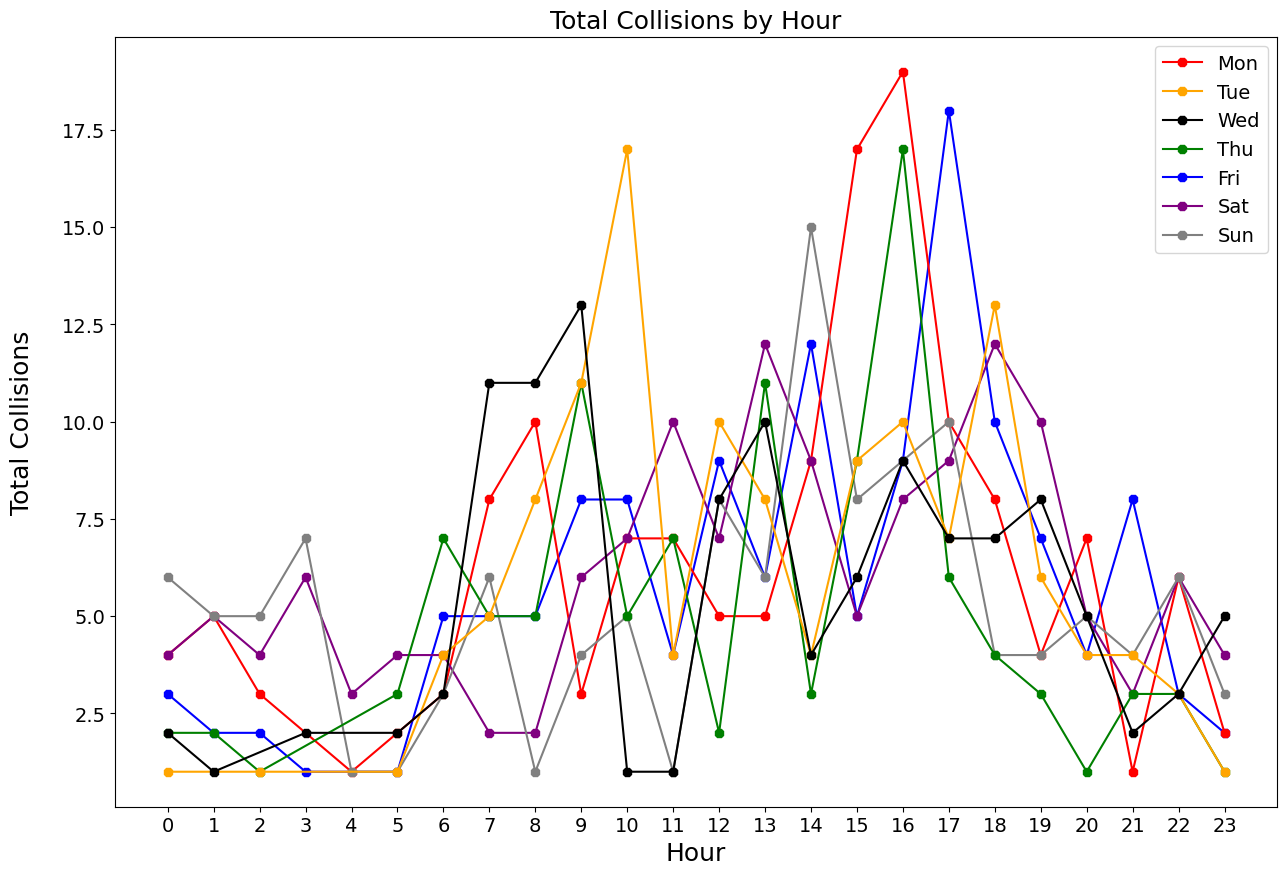

In [25]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

mycolors = {'Mon':'red', 
            'Tue':'orange', 
            'Wed':'black',
            'Thu':'green', 
            'Fri':'blue', 
            'Sat':'purple',
            'Sun':'grey'}

for key, grp in crash_by_day.groupby('Weekday'): 
    grp.plot(ax = ax, kind = 'line', x='Hour', y = 'count', color = mycolors[key], label = key, marker = '8')

plt.title('Total Collisions by Hour', fontsize = 18)
ax.set_xlabel('Hour', fontsize = 18)
ax.set_ylabel('Total Collisions', fontsize = 18, labelpad = 20)
ax.tick_params(axis = "x", labelsize = 14, rotation = 0)
ax.tick_params(axis = "y", labelsize = 14, rotation = 0)
ax.set_xticks(np.arange(24))

handles, labels = ax.get_legend_handles_labels() 
handles = [handles[1], handles[5], handles[6], handles[4], handles[0], handles[2], handles[3]] #captures the position they are currently in and reshuffles the colors/labels
labels = [labels[1], labels[5], labels[6], labels[4], labels[0], labels[2], labels[3]]
plt.legend(handles, labels, loc = 'best', fontsize=14, ncol=1)
plt.show()